# Dealing with massively imbalanced datasets for improved fraud detection in the banking sector.

Use of synthetic data generation to balance highly imbalanced classes, in particular, generation of synthetic fraudulent events.

The use of synthetic data for this type of use cases helps to improve the accuracy of fraud detection models in many different areas from the banking industry.


### Machine Learning and imbalanced datasets
Highly imbalanced datasets are extremely challenging for data teams, and they can be found very often in the industry, wether in topics such as detecting fraudulent events, but also for money laundry and even credit underwriting.

The commonnality between each one of these use cases? The fact that only a small portion of the overall transactions represent one particular class, for fraud problems, only a portion of those transactions were, in reality, a fraudulent event.

## Credit Fraud - a highly imbalanced dataset
The dataset in this example use case is from Kaggle - ["Credit Card Fraud detection"](https://www.kaggle.com/mlg-ulb/creditcardfraud) dataset, as for demonstration purposes we are only able to use datasets from the public domain.
This dataset includes labeled transactions from European credit car holders, and the data provided is a result from a dimensionality reduction, containing 27 continous features and a time column - the number of secons elapsed between the first and the last transaction of the dataset.

### The dataset Exploratory data analysis
(Include here some input on how highly imbalanced are the datasets)

(Include here some metrics and some validations that where done using YData's lib for data analysis)


In [1]:
!conda install -y scikit-learn==0.23.2 pandas==1.0.5 matplotlib==3.3.2 numpy==1.19.2
!conda install -c conda-forge -y xgboost==1.3.*
!pip install ydata-synthetic==0.2.*

Solving environment: done

## Package Plan ##

  environment location: /home/fabiana/miniconda3/envs/algorithmia

  added / updated specs:
    - matplotlib==3.3.2
    - numpy==1.19.2
    - pandas==1.0.5
    - scikit-learn==0.23.2


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.12.~ --> pkgs/main::ca-certificates-2021.1.19-h06a4308_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2020.12.5-py38h5~ --> pkgs/main::certifi-2020.12.5-py38h06a4308_0
  openssl            conda-forge::openssl-1.1.1j-h7f98852_0 --> pkgs/main::openssl-1.1.1j-h27cfd23_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /home/fabiana/miniconda3/envs/algorithmia

  added / updated specs:
    - xgboost=1.3


The following packages will be UPDATED:

  certifi            pkgs/main::certifi-2020.1

In [2]:
#Download the data from kaggle and read it using pandas
from datetime import datetime
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#Get the credit fraud dataset
credit = pd.read_csv("./creditcard.csv")

In [4]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


This dataset is highly imbalanced. Let's check the behaviour of the imbalanced classes.

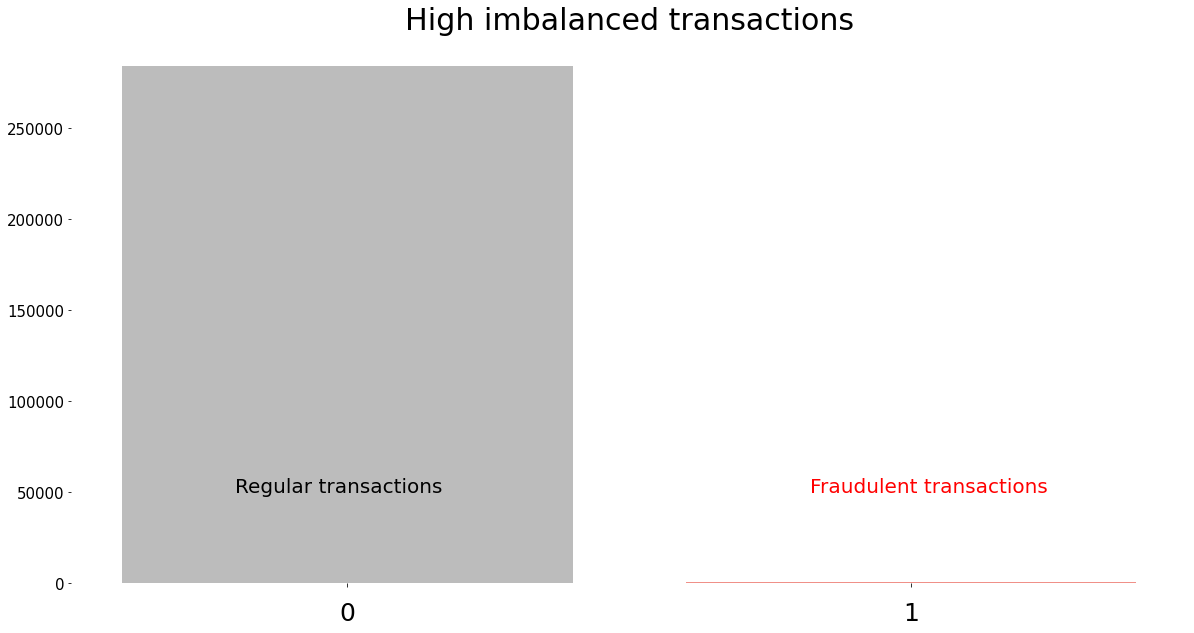

In [5]:
fig, ax = plt.subplots(figsize=(20,10))

#Remove the frame around
#Have this as an auxiliary function
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.bar([0, 1], pd.value_counts(credit['Class'].values, sort=True), alpha=0.5, color=['#7A7A7A','#E32212'])
plt.title('High imbalanced transactions', fontsize=30, pad=10)
plt.annotate('Fraudulent transactions', (0.82, 50000), fontsize=20, color='red')
plt.annotate('Regular transactions', (-0.2, 50000), fontsize=20, color='black')
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_ticks([0,1])
ax.tick_params(axis='x', which='major', pad=15)
ax.xaxis.set_tick_params(labelsize=25)

Text(0.5, 1.0, 'Scatter plot for V2 and V4 eigenvectors')

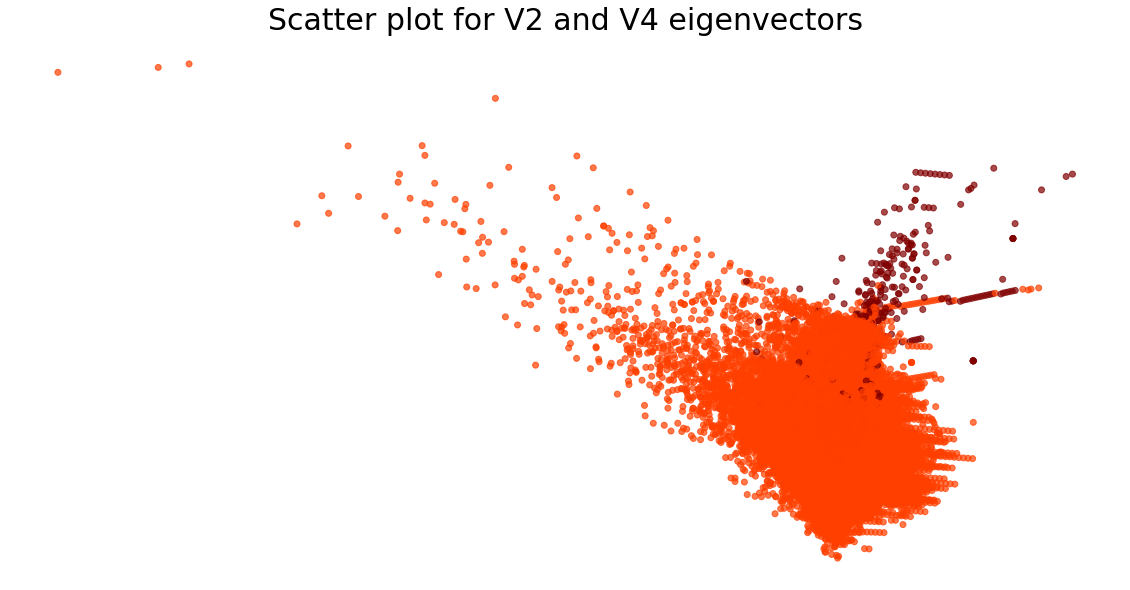

In [6]:
#Scatter plot with Class colouring the different elements from the plot
#As this dataset is the result of a PCA we will be using 2 eigen vectors for the plot
import matplotlib as m
import numpy as np

cmap = m.cm.jet(np.linspace(0,1,26))
cmap = m.colors.ListedColormap(cmap[21:,:-1])

fig, ax = plt.subplots(figsize=(20,10))

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.scatter(credit['V2'],credit['V4'], alpha=0.7, c=credit['Class'],cmap=cmap)
plt.axis('off')
plt.title('Scatter plot for V2 and V4 eigenvectors', fontsize=30, pad=10)

Splitting the dataset in train and test sets. The test set will be used again at the end of our iteration

In [7]:
X = credit.drop('Class', axis=1)
cols = X.columns
X = X.values
y = credit['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807


In [8]:
count_original = np.unique(y, return_counts=True)
count_train = np.unique(y_train, return_counts=True)
count_test = np.unique(y_test, return_counts=True)

print("Ratio between fraud and normal events for the \033[1mfull\033[0m  dataset:"+ " {:.2}%".format(count_train[1][1]/count_train[1][0]))
print("Ratio between fraud and normal events for the \033[1mtrain\033[0m dataset:"+ " {:.2}%".format(count_train[1][1]/count_train[1][0]))
print("Ratio between fraud and normal events for the \033[1mtest\033[0m dataset:"+" {:.2}%".format(count_test[1][1]/count_test[1][0]))

Ratio between fraud and normal events for the full  dataset: 0.0017%
Ratio between fraud and normal events for the train dataset: 0.0017%
Ratio between fraud and normal events for the test dataset: 0.0017%


### The first model
Let's try to develop a model based on the assumption that everything is ok with our dataset, and understand how good is our classifier to indetify fraudulent events.
Here we've decided to develop a classifier using [RandomForest from the scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) package.

In [9]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [10]:
#Data scaling and preprocessing before training the model
from sklearn.preprocessing import RobustScaler, StandardScaler

def preprocess_df(df, std_scaler, rob_scaler):
    df['Amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
    df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
    return df

In [11]:
stdscaler = StandardScaler()
robscaler = RobustScaler()

X_train = preprocess_df(X_train, stdscaler, robscaler)

In [12]:
#Apply the same trasnformation to the test dataset
X_test = preprocess_df(X_test, stdscaler, robscaler)

In [13]:
#Using XGBOOST model to train the model
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


def XGBoost_Classifier(X, y, Xtest):
    """XGBoost training code"""
    classifier = XGBClassifier()
    print('Start fitting XGBoost classifier')
    classifier.fit(X, y)
    y_pred = classifier.predict(Xtest)
    print('Classifier trained.')
    return classifier, y_pred

classifier_model, y_pred = XGBoost_Classifier(X_train, y_train, X_test)

Start fitting XGBoost classifier


/home/fabiana/miniconda3/envs/algorithmia/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1614844506100/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classifier trained.


In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Print precision / recall report
print('Overall accuracy score :',accuracy_score(y_test, y_pred))
print('Classifier performance report: ')
print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud']))

Overall accuracy score : 0.9995318516437859
Classifier performance report: 
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85296
       Fraud       0.96      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



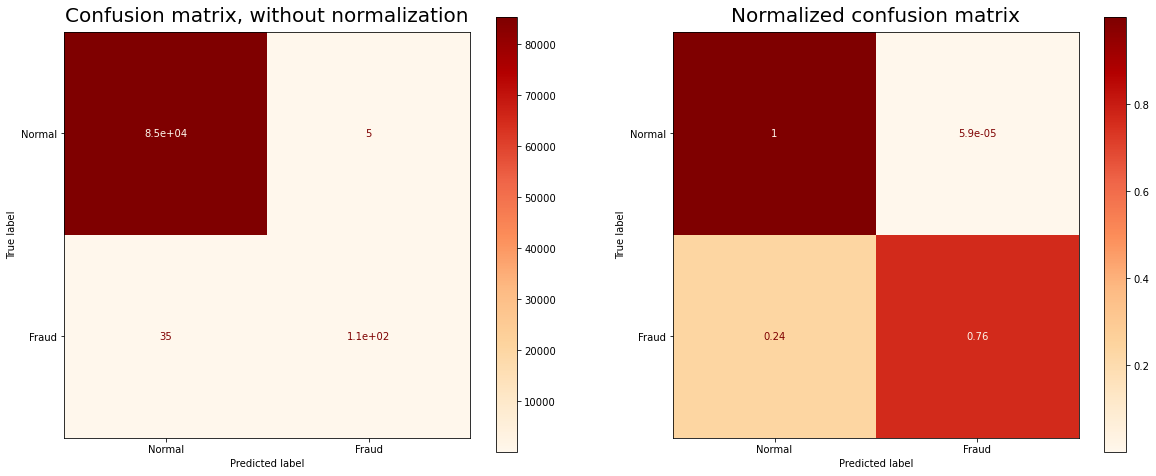

In [15]:
#Now let's check the real metrics for this classifier
from sklearn.metrics import plot_confusion_matrix


def print_confusion_matrix(model, X_test, y_test):
    """ Plot normalized and non-normalized confusion matrices """
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]

    fig, axes = plt.subplots(1,2,figsize=(20,8))
    for (title, normalize), ax in zip(titles_options, axes):

        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=["Normal", "Fraud"],
                                     cmap=plt.cm.OrRd,
                                     normalize=normalize,
                                     ax=ax)

        ax.set_title(title, fontsize=20, pad=10)

print_confusion_matrix(classifier_model, X_test, y_test)

## Synthetic data to improve the detection of fraud

### Synthetic data with YData-synthetic open-source package

In this case the objective is to synthesize only the fraudulent events. Through the augmentation of fraudulent events we are able to improve the results the results of our classifier.

In [16]:
#Let's filter by fraudulent events only
aux = X_train.copy()
aux['y'] = y_train.reset_index()['Class']

non_fraud = aux[aux['y'] == 0]
fraud = aux[aux['y']==1]

del aux

In [31]:
#Generate synthetic data using ydata-synthetic open-source framework
#For improved an optimized results reach our YData to know more about dedicated, scalable and optimized synthesizers.
from ydata_synthetic.synthesizers.regular import WGAN_GP

noise_dim = 32
dim = 128
batch_size = 100

log_step = 100
epochs = 500+1
learning_rate = 1e-4
beta_1 = 0.5
beta_2 = 0.9
models_dir = './cache'

gan_args = [batch_size, learning_rate, beta_1, beta_2, noise_dim, fraud.shape[1]-1, dim]
train_args = ['', epochs, log_step]

fraud_synth = WGAN_GP(gan_args, n_critic=3)
fraud_synth.train(fraud.drop('y', axis=1), train_args)

synthetic_fraud = fraud_synth.sample(500)
synthetic_fraud.columns = fraud.drop('y', axis=1).columns

  3%|▎         | 13/501 [00:01<00:28, 17.08it/s]

Iteration: 0 | disc_loss: 10.369050979614258 | gen_loss: -0.03196945786476135
Iteration: 1 | disc_loss: 5.569023132324219 | gen_loss: -0.03458859771490097
Iteration: 2 | disc_loss: 3.180042028427124 | gen_loss: -0.03419188782572746
Iteration: 3 | disc_loss: 1.6898927688598633 | gen_loss: -0.03330139443278313
Iteration: 4 | disc_loss: 1.3075814247131348 | gen_loss: -0.03038720041513443
Iteration: 5 | disc_loss: 0.7843482494354248 | gen_loss: -0.037584587931632996
Iteration: 6 | disc_loss: 0.27167510986328125 | gen_loss: -0.03936304152011871
Iteration: 7 | disc_loss: -0.17942476272583008 | gen_loss: -0.03987143933773041
Iteration: 8 | disc_loss: -0.4317728281021118 | gen_loss: -0.03990338370203972
Iteration: 9 | disc_loss: -0.6377439498901367 | gen_loss: -0.043494682759046555
Iteration: 10 | disc_loss: -0.7061970233917236 | gen_loss: -0.04494728893041611
Iteration: 11 | disc_loss: -0.8525708913803101 | gen_loss: -0.04361160099506378
Iteration: 12 | disc_loss: -0.9977356195449829 | gen_lo

  7%|▋         | 37/501 [00:01<00:09, 48.75it/s]

Iteration: 22 | disc_loss: -1.8175196647644043 | gen_loss: -0.06678204983472824
Iteration: 23 | disc_loss: -1.8720860481262207 | gen_loss: -0.06803140044212341
Iteration: 24 | disc_loss: -1.9078335762023926 | gen_loss: -0.07440788298845291
Iteration: 25 | disc_loss: -1.9574573040008545 | gen_loss: -0.07395334541797638
Iteration: 26 | disc_loss: -2.0385217666625977 | gen_loss: -0.08427407592535019
Iteration: 27 | disc_loss: -2.0405900478363037 | gen_loss: -0.08282841742038727
Iteration: 28 | disc_loss: -2.103461503982544 | gen_loss: -0.09396461397409439
Iteration: 29 | disc_loss: -2.1143991947174072 | gen_loss: -0.09530354291200638
Iteration: 30 | disc_loss: -2.1205801963806152 | gen_loss: -0.10454357415437698
Iteration: 31 | disc_loss: -2.198141574859619 | gen_loss: -0.113043874502182
Iteration: 32 | disc_loss: -2.2592501640319824 | gen_loss: -0.12520484626293182
Iteration: 33 | disc_loss: -2.2512855529785156 | gen_loss: -0.11779147386550903
Iteration: 34 | disc_loss: -2.31921958923339

 12%|█▏        | 59/501 [00:01<00:06, 70.93it/s]

Iteration: 45 | disc_loss: -2.3192849159240723 | gen_loss: -0.23162220418453217
Iteration: 46 | disc_loss: -2.32235050201416 | gen_loss: -0.22883369028568268
Iteration: 47 | disc_loss: -2.2899062633514404 | gen_loss: -0.23278120160102844
Iteration: 48 | disc_loss: -2.347641706466675 | gen_loss: -0.27534905076026917
Iteration: 49 | disc_loss: -2.3287980556488037 | gen_loss: -0.26390188932418823
Iteration: 50 | disc_loss: -2.356764793395996 | gen_loss: -0.2944958209991455
Iteration: 51 | disc_loss: -2.3229446411132812 | gen_loss: -0.2818852663040161
Iteration: 52 | disc_loss: -2.3159120082855225 | gen_loss: -0.2883771061897278
Iteration: 53 | disc_loss: -2.293874740600586 | gen_loss: -0.3146507143974304
Iteration: 54 | disc_loss: -2.289186477661133 | gen_loss: -0.31435221433639526
Iteration: 55 | disc_loss: -2.2774710655212402 | gen_loss: -0.34764182567596436
Iteration: 56 | disc_loss: -2.2840709686279297 | gen_loss: -0.3660951554775238
Iteration: 57 | disc_loss: -2.2086308002471924 | ge

 16%|█▌        | 81/501 [00:01<00:04, 86.18it/s]

Iteration: 66 | disc_loss: -2.0874593257904053 | gen_loss: -0.48473191261291504
Iteration: 67 | disc_loss: -2.078399181365967 | gen_loss: -0.4597678482532501
Iteration: 68 | disc_loss: -2.038536310195923 | gen_loss: -0.493264764547348
Iteration: 69 | disc_loss: -2.064993381500244 | gen_loss: -0.5237131714820862
Iteration: 70 | disc_loss: -2.0387651920318604 | gen_loss: -0.5500885844230652
Iteration: 71 | disc_loss: -2.04111909866333 | gen_loss: -0.5794022083282471
Iteration: 72 | disc_loss: -2.01339054107666 | gen_loss: -0.5890592336654663
Iteration: 73 | disc_loss: -1.9659465551376343 | gen_loss: -0.5490588545799255
Iteration: 74 | disc_loss: -1.9556905031204224 | gen_loss: -0.5857901573181152
Iteration: 75 | disc_loss: -1.9556529521942139 | gen_loss: -0.6152179837226868
Iteration: 76 | disc_loss: -1.9310874938964844 | gen_loss: -0.5923269391059875
Iteration: 77 | disc_loss: -1.9181346893310547 | gen_loss: -0.6406534314155579
Iteration: 78 | disc_loss: -1.8766752481460571 | gen_loss: 

 21%|██        | 103/501 [00:01<00:04, 93.94it/s]

Iteration: 89 | disc_loss: -1.5956897735595703 | gen_loss: -0.6712996959686279
Iteration: 90 | disc_loss: -1.5936360359191895 | gen_loss: -0.7121791243553162
Iteration: 91 | disc_loss: -1.5890406370162964 | gen_loss: -0.695370078086853
Iteration: 92 | disc_loss: -1.6156105995178223 | gen_loss: -0.7303338646888733
Iteration: 93 | disc_loss: -1.4974162578582764 | gen_loss: -0.6334710121154785
Iteration: 94 | disc_loss: -1.5041561126708984 | gen_loss: -0.6941503286361694
Iteration: 95 | disc_loss: -1.5232806205749512 | gen_loss: -0.718682050704956
Iteration: 96 | disc_loss: -1.4892926216125488 | gen_loss: -0.6747758984565735
Iteration: 97 | disc_loss: -1.4826014041900635 | gen_loss: -0.698760449886322
Iteration: 98 | disc_loss: -1.501408576965332 | gen_loss: -0.7006476521492004
Iteration: 99 | disc_loss: -1.4408023357391357 | gen_loss: -0.6257373690605164
Iteration: 100 | disc_loss: -1.4077218770980835 | gen_loss: -0.6070384383201599
Iteration: 101 | disc_loss: -1.4019107818603516 | gen_l

 25%|██▌       | 127/501 [00:02<00:03, 103.98it/s]

Iteration: 111 | disc_loss: -1.3708049058914185 | gen_loss: -0.4110734164714813
Iteration: 112 | disc_loss: -1.3040385246276855 | gen_loss: -0.3450242280960083
Iteration: 113 | disc_loss: -1.3113585710525513 | gen_loss: -0.3554050028324127
Iteration: 114 | disc_loss: -1.3304532766342163 | gen_loss: -0.2650770843029022
Iteration: 115 | disc_loss: -1.2659986019134521 | gen_loss: -0.22023002803325653
Iteration: 116 | disc_loss: -1.3285975456237793 | gen_loss: -0.2697641849517822
Iteration: 117 | disc_loss: -1.3099843263626099 | gen_loss: -0.17042648792266846
Iteration: 118 | disc_loss: -1.3239140510559082 | gen_loss: -0.16480815410614014
Iteration: 119 | disc_loss: -1.271432638168335 | gen_loss: -0.11790461838245392
Iteration: 120 | disc_loss: -1.2703511714935303 | gen_loss: -0.0972551554441452
Iteration: 121 | disc_loss: -1.3273874521255493 | gen_loss: -0.15807859599590302
Iteration: 122 | disc_loss: -1.2679170370101929 | gen_loss: -0.08483286201953888
Iteration: 123 | disc_loss: -1.1948

 30%|███       | 151/501 [00:02<00:03, 109.01it/s]

Iteration: 134 | disc_loss: -1.2536084651947021 | gen_loss: -0.08435013890266418
Iteration: 135 | disc_loss: -1.252549171447754 | gen_loss: -0.05856943503022194
Iteration: 136 | disc_loss: -1.244417428970337 | gen_loss: -0.0439428836107254
Iteration: 137 | disc_loss: -1.3127492666244507 | gen_loss: -0.013199294917285442
Iteration: 138 | disc_loss: -1.2829936742782593 | gen_loss: -0.011056385934352875
Iteration: 139 | disc_loss: -1.2712247371673584 | gen_loss: -0.0318911075592041
Iteration: 140 | disc_loss: -1.3018447160720825 | gen_loss: -0.007732830010354519
Iteration: 141 | disc_loss: -1.2638980150222778 | gen_loss: 0.00018247037951368839
Iteration: 142 | disc_loss: -1.308753252029419 | gen_loss: 0.03957133740186691
Iteration: 143 | disc_loss: -1.2997119426727295 | gen_loss: 0.07090966403484344
Iteration: 144 | disc_loss: -1.2523330450057983 | gen_loss: -0.019076921045780182
Iteration: 145 | disc_loss: -1.2004623413085938 | gen_loss: -0.011246656998991966
Iteration: 146 | disc_loss: 

 35%|███▍      | 175/501 [00:02<00:03, 106.09it/s]

Iteration: 158 | disc_loss: -1.2844561338424683 | gen_loss: 0.03507799655199051
Iteration: 159 | disc_loss: -1.3209973573684692 | gen_loss: 0.028566259890794754
Iteration: 160 | disc_loss: -1.253593921661377 | gen_loss: 0.04023708775639534
Iteration: 161 | disc_loss: -1.1978561878204346 | gen_loss: 0.005769966170191765
Iteration: 162 | disc_loss: -1.2319903373718262 | gen_loss: -0.0056930952705442905
Iteration: 163 | disc_loss: -1.308054804801941 | gen_loss: 0.010138806886970997
Iteration: 164 | disc_loss: -1.2629613876342773 | gen_loss: 0.031561437994241714
Iteration: 165 | disc_loss: -1.2918953895568848 | gen_loss: 0.11377685517072678
Iteration: 166 | disc_loss: -1.2502939701080322 | gen_loss: 0.07952450960874557
Iteration: 167 | disc_loss: -1.2007596492767334 | gen_loss: 0.11739039421081543
Iteration: 168 | disc_loss: -1.226757287979126 | gen_loss: 0.09496168792247772
Iteration: 169 | disc_loss: -1.2316068410873413 | gen_loss: 0.0194900743663311
Iteration: 170 | disc_loss: -1.196456

 39%|███▉      | 197/501 [00:02<00:02, 106.60it/s]

Iteration: 179 | disc_loss: -1.2707618474960327 | gen_loss: 0.03945281356573105
Iteration: 180 | disc_loss: -1.274537444114685 | gen_loss: 0.05093536525964737
Iteration: 181 | disc_loss: -1.2383079528808594 | gen_loss: 0.03237954527139664
Iteration: 182 | disc_loss: -1.2323437929153442 | gen_loss: 0.0582578144967556
Iteration: 183 | disc_loss: -1.3122225999832153 | gen_loss: -0.00540053378790617
Iteration: 184 | disc_loss: -1.2954517602920532 | gen_loss: 0.023547803983092308
Iteration: 185 | disc_loss: -1.2616406679153442 | gen_loss: -0.0994277223944664
Iteration: 186 | disc_loss: -1.2409100532531738 | gen_loss: -0.0933789610862732
Iteration: 187 | disc_loss: -1.2808359861373901 | gen_loss: -0.06576669961214066
Iteration: 188 | disc_loss: -1.2218247652053833 | gen_loss: 0.023114606738090515
Iteration: 189 | disc_loss: -1.2473609447479248 | gen_loss: -0.01804165355861187
Iteration: 190 | disc_loss: -1.2168151140213013 | gen_loss: 0.05618678405880928
Iteration: 191 | disc_loss: -1.247134

 44%|████▍     | 220/501 [00:02<00:02, 107.52it/s]

Iteration: 201 | disc_loss: -1.2030824422836304 | gen_loss: 0.005778480786830187
Iteration: 202 | disc_loss: -1.2239211797714233 | gen_loss: -0.01904565654695034
Iteration: 203 | disc_loss: -1.2318521738052368 | gen_loss: -0.03739318251609802
Iteration: 204 | disc_loss: -1.1881746053695679 | gen_loss: 0.03559888154268265
Iteration: 205 | disc_loss: -1.220440149307251 | gen_loss: -0.051661111414432526
Iteration: 206 | disc_loss: -1.205180048942566 | gen_loss: 0.0008852247265167534
Iteration: 207 | disc_loss: -1.1972121000289917 | gen_loss: 0.0384095162153244
Iteration: 208 | disc_loss: -1.1778184175491333 | gen_loss: -0.02871200256049633
Iteration: 209 | disc_loss: -1.236214518547058 | gen_loss: -0.03922861069440842
Iteration: 210 | disc_loss: -1.1513724327087402 | gen_loss: -0.008487925864756107
Iteration: 211 | disc_loss: -1.1547850370407104 | gen_loss: -0.012002991512417793
Iteration: 212 | disc_loss: -1.2060104608535767 | gen_loss: -0.024625802412629128
Iteration: 213 | disc_loss: -

 49%|████▊     | 244/501 [00:03<00:02, 108.64it/s]

Iteration: 225 | disc_loss: -1.1554588079452515 | gen_loss: -0.08801773935556412
Iteration: 226 | disc_loss: -1.1540367603302002 | gen_loss: -0.09934094548225403
Iteration: 227 | disc_loss: -1.096128225326538 | gen_loss: -0.11377815902233124
Iteration: 228 | disc_loss: -1.1538735628128052 | gen_loss: -0.09401362389326096
Iteration: 229 | disc_loss: -1.1076247692108154 | gen_loss: -0.05773289501667023
Iteration: 230 | disc_loss: -1.1288249492645264 | gen_loss: -0.07028882205486298
Iteration: 231 | disc_loss: -1.1635777950286865 | gen_loss: -0.14088207483291626
Iteration: 232 | disc_loss: -1.1689239740371704 | gen_loss: -0.14456461369991302
Iteration: 233 | disc_loss: -1.0827137231826782 | gen_loss: -0.06331071257591248
Iteration: 234 | disc_loss: -1.1147964000701904 | gen_loss: -0.047271858900785446
Iteration: 235 | disc_loss: -1.1104458570480347 | gen_loss: -0.08412691205739975
Iteration: 236 | disc_loss: -1.1197782754898071 | gen_loss: -0.14681822061538696
Iteration: 237 | disc_loss: 

 53%|█████▎    | 266/501 [00:03<00:02, 108.03it/s]

Iteration: 247 | disc_loss: -1.0597103834152222 | gen_loss: -0.08295886218547821
Iteration: 248 | disc_loss: -1.0192184448242188 | gen_loss: -0.07082480937242508
Iteration: 249 | disc_loss: -1.0987015962600708 | gen_loss: -0.1426459401845932
Iteration: 250 | disc_loss: -1.0904749631881714 | gen_loss: -0.05846313014626503
Iteration: 251 | disc_loss: -1.0560959577560425 | gen_loss: -0.10056056827306747
Iteration: 252 | disc_loss: -0.9834482073783875 | gen_loss: -0.1299493908882141
Iteration: 253 | disc_loss: -1.0833747386932373 | gen_loss: -0.2084718644618988
Iteration: 254 | disc_loss: -1.1195051670074463 | gen_loss: -0.23436132073402405
Iteration: 255 | disc_loss: -1.0965105295181274 | gen_loss: -0.12285587191581726
Iteration: 256 | disc_loss: -1.033764123916626 | gen_loss: -0.14539150893688202
Iteration: 257 | disc_loss: -1.0561654567718506 | gen_loss: -0.11749302595853806
Iteration: 258 | disc_loss: -1.040501356124878 | gen_loss: -0.10422678291797638
Iteration: 259 | disc_loss: -1.06

 58%|█████▊    | 289/501 [00:03<00:01, 108.93it/s]

Iteration: 269 | disc_loss: -1.0386335849761963 | gen_loss: -0.10545693337917328
Iteration: 270 | disc_loss: -1.0506572723388672 | gen_loss: -0.07741349190473557
Iteration: 271 | disc_loss: -1.0122047662734985 | gen_loss: -0.08192409574985504
Iteration: 272 | disc_loss: -1.0494749546051025 | gen_loss: -0.14395906031131744
Iteration: 273 | disc_loss: -1.0601907968521118 | gen_loss: -0.03379800170660019
Iteration: 274 | disc_loss: -1.003359317779541 | gen_loss: -0.02214103192090988
Iteration: 275 | disc_loss: -1.0498936176300049 | gen_loss: -0.0599360354244709
Iteration: 276 | disc_loss: -1.0230833292007446 | gen_loss: -0.05653303489089012
Iteration: 277 | disc_loss: -1.050826907157898 | gen_loss: -0.1172705665230751
Iteration: 278 | disc_loss: -1.0495953559875488 | gen_loss: -0.0341995432972908
Iteration: 279 | disc_loss: -1.0138466358184814 | gen_loss: 0.008107059635221958
Iteration: 280 | disc_loss: -0.9576770067214966 | gen_loss: -0.004292160272598267
Iteration: 281 | disc_loss: -1.0

 62%|██████▏   | 311/501 [00:03<00:01, 105.02it/s]

Iteration: 291 | disc_loss: -0.9536013007164001 | gen_loss: -0.1016158014535904
Iteration: 292 | disc_loss: -1.0138139724731445 | gen_loss: -0.11277545243501663
Iteration: 293 | disc_loss: -1.0055475234985352 | gen_loss: -0.13592830300331116
Iteration: 294 | disc_loss: -1.0363757610321045 | gen_loss: -0.1351688653230667
Iteration: 295 | disc_loss: -1.0246808528900146 | gen_loss: -0.1034894660115242
Iteration: 296 | disc_loss: -0.8902919888496399 | gen_loss: -0.005539081525057554
Iteration: 297 | disc_loss: -1.033874750137329 | gen_loss: 0.023833706974983215
Iteration: 298 | disc_loss: -1.049703598022461 | gen_loss: 0.0820084735751152
Iteration: 299 | disc_loss: -1.0924763679504395 | gen_loss: 0.07482899725437164
Iteration: 300 | disc_loss: -1.0112133026123047 | gen_loss: 0.11186229437589645
Iteration: 301 | disc_loss: -1.019372582435608 | gen_loss: 0.0929117202758789
Iteration: 302 | disc_loss: -1.0261033773422241 | gen_loss: 0.11303064227104187
Iteration: 303 | disc_loss: -0.978785276

 66%|██████▋   | 333/501 [00:03<00:01, 104.56it/s]

Iteration: 312 | disc_loss: -1.0646966695785522 | gen_loss: 0.17385327816009521
Iteration: 313 | disc_loss: -1.022719383239746 | gen_loss: 0.2052542269229889
Iteration: 314 | disc_loss: -1.0782026052474976 | gen_loss: 0.11570744216442108
Iteration: 315 | disc_loss: -1.0780171155929565 | gen_loss: -0.015564381144940853
Iteration: 316 | disc_loss: -1.0511714220046997 | gen_loss: 0.001787666929885745
Iteration: 317 | disc_loss: -0.9888308048248291 | gen_loss: 0.08459871262311935
Iteration: 318 | disc_loss: -0.9686464071273804 | gen_loss: 0.17093195021152496
Iteration: 319 | disc_loss: -1.0489879846572876 | gen_loss: 0.06877321749925613
Iteration: 320 | disc_loss: -1.0510847568511963 | gen_loss: 0.1656285524368286
Iteration: 321 | disc_loss: -1.0469481945037842 | gen_loss: 0.03906393051147461
Iteration: 322 | disc_loss: -1.0481969118118286 | gen_loss: 0.002955762203782797
Iteration: 323 | disc_loss: -1.045495629310608 | gen_loss: 0.07575876265764236
Iteration: 324 | disc_loss: -1.042187094

 71%|███████   | 355/501 [00:04<00:01, 103.84it/s]

Iteration: 333 | disc_loss: -1.041035532951355 | gen_loss: 0.2890442907810211
Iteration: 334 | disc_loss: -1.0523320436477661 | gen_loss: 0.23704275488853455
Iteration: 335 | disc_loss: -1.0374125242233276 | gen_loss: 0.2366439402103424
Iteration: 336 | disc_loss: -1.0668808221817017 | gen_loss: 0.28906846046447754
Iteration: 337 | disc_loss: -1.1225128173828125 | gen_loss: 0.252437949180603
Iteration: 338 | disc_loss: -0.9896126985549927 | gen_loss: 0.2939012050628662
Iteration: 339 | disc_loss: -1.0841789245605469 | gen_loss: 0.1818000078201294
Iteration: 340 | disc_loss: -1.0861737728118896 | gen_loss: 0.22950388491153717
Iteration: 341 | disc_loss: -1.1341888904571533 | gen_loss: 0.10483286529779434
Iteration: 342 | disc_loss: -1.1181914806365967 | gen_loss: 0.05378825590014458
Iteration: 343 | disc_loss: -1.0376183986663818 | gen_loss: 0.29744789004325867
Iteration: 344 | disc_loss: -1.0834507942199707 | gen_loss: 0.2757478952407837
Iteration: 345 | disc_loss: -1.0922179222106934 

 75%|███████▌  | 377/501 [00:04<00:01, 105.67it/s]

Iteration: 355 | disc_loss: -1.0976868867874146 | gen_loss: 0.18207098543643951
Iteration: 356 | disc_loss: -1.0265125036239624 | gen_loss: 0.2993532717227936
Iteration: 357 | disc_loss: -1.1339143514633179 | gen_loss: 0.1470145583152771
Iteration: 358 | disc_loss: -1.0994298458099365 | gen_loss: 0.2375095933675766
Iteration: 359 | disc_loss: -0.9988189935684204 | gen_loss: 0.26333510875701904
Iteration: 360 | disc_loss: -1.097992181777954 | gen_loss: 0.15231956541538239
Iteration: 361 | disc_loss: -1.1017917394638062 | gen_loss: 0.27968868613243103
Iteration: 362 | disc_loss: -1.1086609363555908 | gen_loss: 0.24147136509418488
Iteration: 363 | disc_loss: -1.1189346313476562 | gen_loss: 0.1304144412279129
Iteration: 364 | disc_loss: -1.136648416519165 | gen_loss: 0.16453677415847778
Iteration: 365 | disc_loss: -1.1194801330566406 | gen_loss: 0.2416534274816513
Iteration: 366 | disc_loss: -1.147020936012268 | gen_loss: 0.16629751026630402
Iteration: 367 | disc_loss: -1.1522905826568604 

 77%|███████▋  | 388/501 [00:04<00:01, 104.38it/s]

Iteration: 377 | disc_loss: -1.070757269859314 | gen_loss: 0.15262405574321747
Iteration: 378 | disc_loss: -1.089547038078308 | gen_loss: 0.24059320986270905
Iteration: 379 | disc_loss: -1.1430367231369019 | gen_loss: 0.26404130458831787
Iteration: 380 | disc_loss: -1.101080060005188 | gen_loss: 0.4225199818611145
Iteration: 381 | disc_loss: -1.174518346786499 | gen_loss: 0.39502188563346863
Iteration: 382 | disc_loss: -1.0684289932250977 | gen_loss: 0.3371638059616089
Iteration: 383 | disc_loss: -1.1394708156585693 | gen_loss: 0.3372967541217804
Iteration: 384 | disc_loss: -1.1225138902664185 | gen_loss: 0.28117233514785767
Iteration: 385 | disc_loss: -1.1198546886444092 | gen_loss: 0.14762091636657715
Iteration: 386 | disc_loss: -1.1233965158462524 | gen_loss: 0.1339998096227646
Iteration: 387 | disc_loss: -1.1332314014434814 | gen_loss: 0.30322346091270447
Iteration: 388 | disc_loss: -1.0909185409545898 | gen_loss: 0.34910857677459717
Iteration: 389 | disc_loss: -1.1408510208129883 

 82%|████████▏ | 411/501 [00:04<00:00, 102.01it/s]

Iteration: 399 | disc_loss: -1.1254414319992065 | gen_loss: 0.3816559314727783
Iteration: 400 | disc_loss: -1.1069214344024658 | gen_loss: 0.2947738766670227
Iteration: 401 | disc_loss: -1.1519986391067505 | gen_loss: 0.42515212297439575
Iteration: 402 | disc_loss: -1.0989842414855957 | gen_loss: 0.44255271553993225
Iteration: 403 | disc_loss: -1.0761052370071411 | gen_loss: 0.49308937788009644
Iteration: 404 | disc_loss: -1.176074743270874 | gen_loss: 0.20262165367603302
Iteration: 405 | disc_loss: -1.1468209028244019 | gen_loss: 0.29384446144104004
Iteration: 406 | disc_loss: -1.1068263053894043 | gen_loss: 0.19422338902950287
Iteration: 407 | disc_loss: -1.071871042251587 | gen_loss: 0.16349491477012634
Iteration: 408 | disc_loss: -1.095481514930725 | gen_loss: 0.21736568212509155
Iteration: 409 | disc_loss: -1.13877534866333 | gen_loss: 0.05191940441727638
Iteration: 410 | disc_loss: -1.0849721431732178 | gen_loss: 0.362040638923645
Iteration: 411 | disc_loss: -1.088892936706543 | 

 87%|████████▋ | 434/501 [00:04<00:00, 107.09it/s]

Iteration: 420 | disc_loss: -1.13527512550354 | gen_loss: 0.287295937538147
Iteration: 421 | disc_loss: -1.1524173021316528 | gen_loss: 0.27979618310928345
Iteration: 422 | disc_loss: -1.1129554510116577 | gen_loss: 0.41433635354042053
Iteration: 423 | disc_loss: -1.1446447372436523 | gen_loss: 0.31222298741340637
Iteration: 424 | disc_loss: -1.1010199785232544 | gen_loss: 0.3266530930995941
Iteration: 425 | disc_loss: -1.070873737335205 | gen_loss: 0.49330466985702515
Iteration: 426 | disc_loss: -1.084437608718872 | gen_loss: 0.44517162442207336
Iteration: 427 | disc_loss: -1.186551809310913 | gen_loss: 0.40417948365211487
Iteration: 428 | disc_loss: -1.124063491821289 | gen_loss: 0.29578766226768494
Iteration: 429 | disc_loss: -1.1224539279937744 | gen_loss: 0.15514399111270905
Iteration: 430 | disc_loss: -1.1649137735366821 | gen_loss: 0.15095452964305878
Iteration: 431 | disc_loss: -1.1666368246078491 | gen_loss: 0.2531934678554535
Iteration: 432 | disc_loss: -1.1826276779174805 | 

 91%|█████████▏| 458/501 [00:05<00:00, 109.26it/s]

Iteration: 443 | disc_loss: -1.1239062547683716 | gen_loss: 0.37877151370048523
Iteration: 444 | disc_loss: -1.1074745655059814 | gen_loss: 0.11732984334230423
Iteration: 445 | disc_loss: -1.2029986381530762 | gen_loss: 0.0866100862622261
Iteration: 446 | disc_loss: -1.1971123218536377 | gen_loss: 0.16066068410873413
Iteration: 447 | disc_loss: -1.1699730157852173 | gen_loss: 0.23829950392246246
Iteration: 448 | disc_loss: -1.1599864959716797 | gen_loss: 0.2832677364349365
Iteration: 449 | disc_loss: -1.0965691804885864 | gen_loss: 0.35804256796836853
Iteration: 450 | disc_loss: -1.0723769664764404 | gen_loss: 0.3967386484146118
Iteration: 451 | disc_loss: -1.0471303462982178 | gen_loss: 0.32842156291007996
Iteration: 452 | disc_loss: -1.0830403566360474 | gen_loss: 0.2961599826812744
Iteration: 453 | disc_loss: -0.9709374904632568 | gen_loss: 0.29144689440727234
Iteration: 454 | disc_loss: -1.1489250659942627 | gen_loss: 0.13175088167190552
Iteration: 455 | disc_loss: -1.0725855827331

 96%|█████████▌| 481/501 [00:05<00:00, 106.97it/s]

Iteration: 465 | disc_loss: -1.1016604900360107 | gen_loss: 0.30635306239128113
Iteration: 466 | disc_loss: -1.0771304368972778 | gen_loss: 0.38153812289237976
Iteration: 467 | disc_loss: -1.0837757587432861 | gen_loss: 0.4053400754928589
Iteration: 468 | disc_loss: -1.0461087226867676 | gen_loss: 0.31853926181793213
Iteration: 469 | disc_loss: -1.1088480949401855 | gen_loss: 0.2547381520271301
Iteration: 470 | disc_loss: -1.0454728603363037 | gen_loss: 0.32926133275032043
Iteration: 471 | disc_loss: -1.0700091123580933 | gen_loss: 0.27652236819267273
Iteration: 472 | disc_loss: -1.1068615913391113 | gen_loss: 0.2069011628627777
Iteration: 473 | disc_loss: -1.0441722869873047 | gen_loss: 0.22188955545425415
Iteration: 474 | disc_loss: -1.0957456827163696 | gen_loss: 0.10731497406959534
Iteration: 475 | disc_loss: -1.1162017583847046 | gen_loss: 0.1635754406452179
Iteration: 476 | disc_loss: -1.1206516027450562 | gen_loss: -0.08915884047746658
Iteration: 477 | disc_loss: -1.068102955818

Synthetic data generation: 100%|██████████| 6/6 [00:00<00:00, 625.35it/s]

Iteration: 488 | disc_loss: -1.0381120443344116 | gen_loss: 0.19024839997291565
Iteration: 489 | disc_loss: -1.1160404682159424 | gen_loss: 0.12637515366077423
Iteration: 490 | disc_loss: -1.0750535726547241 | gen_loss: 0.1326170563697815
Iteration: 491 | disc_loss: -1.1294416189193726 | gen_loss: 0.20854856073856354
Iteration: 492 | disc_loss: -1.0667181015014648 | gen_loss: 0.13273610174655914
Iteration: 493 | disc_loss: -1.1509281396865845 | gen_loss: 0.1851695477962494
Iteration: 494 | disc_loss: -1.012919545173645 | gen_loss: 0.08151305466890335
Iteration: 495 | disc_loss: -1.1162059307098389 | gen_loss: -0.025300752371549606
Iteration: 496 | disc_loss: -0.9389684200286865 | gen_loss: -0.01565217785537243
Iteration: 497 | disc_loss: -1.0292965173721313 | gen_loss: 0.004769559018313885
Iteration: 498 | disc_loss: -1.0014100074768066 | gen_loss: 0.053231269121170044
Iteration: 499 | disc_loss: -1.0779104232788086 | gen_loss: 0.005411806050688028
Iteration: 500 | disc_loss: -1.092494

In [32]:
synthetic_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.366994,-6.814671,4.458257,-6.551041,2.597865,-3.660300,0.390746,-7.441010,-2.475354,-2.208043,...,0.779793,-1.230981,0.374189,0.398604,-0.050992,0.003190,-0.440757,-1.429551,-0.317580,-0.320352
1,-0.518752,-8.494321,5.295461,-8.237733,3.719440,-5.836199,-0.675629,-8.734824,0.124340,-3.160357,...,0.786593,0.310745,-0.031782,0.046177,0.490099,-0.058309,-0.218772,-1.126824,-0.284885,-0.147880
2,-0.059165,-8.831979,5.612186,-9.198966,3.648854,-6.635529,-0.487858,-9.175739,1.773921,-3.338804,...,0.353078,0.487574,-0.199402,0.303253,0.517982,0.336381,-0.005538,-1.277781,-0.269597,0.171131
3,0.034528,-2.306203,2.565661,-3.035423,2.075911,-0.514732,0.536680,-3.768511,-3.806537,-1.213886,...,0.475153,0.034756,-0.349536,0.510273,-0.042398,0.294710,-0.210990,-0.352888,0.264972,-0.394801
4,-0.162433,-6.709359,5.276760,-7.460644,3.413848,-4.819754,-0.785346,-7.589999,-0.641252,-2.269802,...,0.989905,0.130122,-0.278061,0.074794,0.373616,0.399245,-0.188386,-0.376612,0.068943,-0.142171


## Visualizing the generated synthetic data

In [33]:
synth_df = synthetic_fraud.copy()
org_df = X_train.copy()

org_df['Class'] = y_train.reset_index()['Class']
org_df['color'] = np.where(org_df['Class']==1, 2, 1)

synth_df['Class'] = 1
synth_df['color'] = 3

full_data = pd.concat([org_df, synth_df])

Using a PCA we are able to  reduce the dimensionality of the dataset and and better visualize the relation between both the synthetic fraud generated events and the ones from the original data, regardless they're fraud or normal events.

The randomness introduced by the synthetic data can help the model to generalize for a new dataset and new fraud events never previously observed.

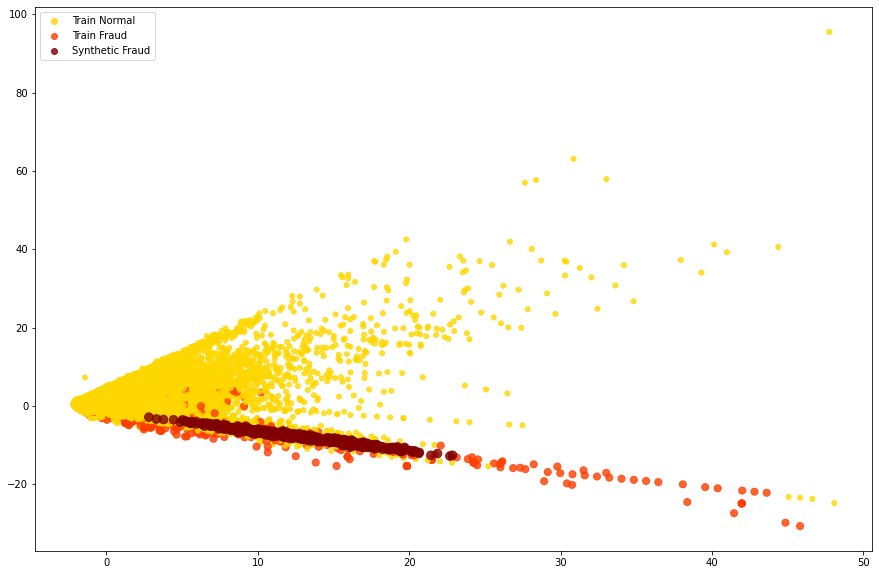

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = full_data.iloc[:, :-2]
color = full_data['color']

fig = plt.figure(1, figsize=(15, 10))
plt.clf()
plt.cla()

cmap = m.cm.jet(np.linspace(0,1,26))
cmap = m.colors.ListedColormap(cmap[17:,:-1])

pca = PCA(n_components=2)
projected = pca.fit_transform(X)

labels = ['Train Normal', 'Train Fraud', 'Synthetic Fraud']

size_map = {1:25, 2:50, 3:75}
sizes = [size_map[x] for x in color]

scatter = plt.scatter(projected[:, 0], projected[:, 1],
                      s=sizes,
                      c=color,
                      cmap=cmap,
                      alpha=0.8)

plt.legend(handles=scatter.legend_elements()[0], labels=labels)
plt.show()

### Testing the classifier capacity after adding more fraudulent events

In [35]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([85296,   147]))

In [36]:
synth_y_train = synth_df['Class']
synth_train = synth_df.drop(['Class', 'color'], axis=1)

X_augmented = pd.concat([X_train, synth_train], axis=0)
y_augmented = pd.concat([y_train, synth_y_train], axis=0)

In [37]:
synth_classmodel, y_pred = XGBoost_Classifier(X_augmented, y_augmented, X_test)

Start fitting XGBoost classifier


/home/fabiana/miniconda3/envs/algorithmia/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:48:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1614844506100/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classifier trained.


In [38]:
# Print precision / recall report
print('Overall accuracy score :',accuracy_score(y_test, y_pred))
print('Classifier performance report: ')
print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud']))

Overall accuracy score : 0.9995669627705019
Classifier performance report: 
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85296
       Fraud       0.95      0.79      0.86       147

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



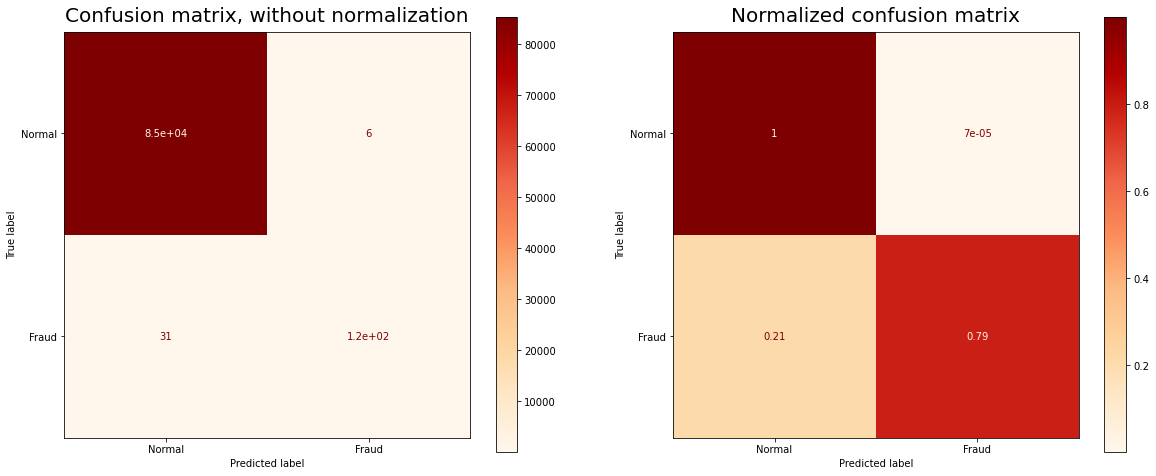

In [39]:
print_confusion_matrix(synth_classmodel, X_test, y_test)

In [40]:
synth_classmodel

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

### Serialize the model with joblib

In [68]:
import joblib
joblib_model = "xgb_with_synth.joblib"
joblib.dump(synth_classmodel, joblib_model)

['xgb_with_synth.joblib']

In [69]:
full_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,color
0,0.343717,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,...,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,-0.165692,0,1
1,0.594843,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,...,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.352239,0,1
2,0.479584,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,...,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0.330886,0,1
3,-0.599866,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,...,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.336067,0,1
4,0.710242,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,...,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.005211,0,1


### Create sample inputs and test them


In [70]:
#Create sample inputs for both "Fraudulent" and "Genuine" transactions

sample_input = credit[credit["Class"]==0].iloc[0:1].drop("Class", axis=1)
sample_input1 = credit[credit["Class"]==1].iloc[0:1].drop("Class", axis=1)

sample_input.to_csv("sample_input.csv", index=False)
sample_input1.to_csv("sample_input1.csv", index=False)

In [71]:
import pandas as pd
import numpy as np

sample_input = pd.read_csv("sample_input.csv")

#Test sample prediction

xgb_synth = joblib.load('xgb_with_synth.joblib')
xgb_synth.predict(sample_input)

array([0])

In [72]:
sample_input1 = pd.read_csv("sample_input1.csv")
xgb_synth.predict(sample_input1)

array([1])

# Algorithmia

This part of the notebook creates a Data Collection on Algorithmia for storing the Data .csv files and the model pickle files.
Once the pickled model is uploaded, an Algorithm needs to be created from the Algorithmia Web IDE or your PC

It requires that you have created a free Algorithmia account first, to run this code.

Note your Username, Password and API key for the Algorithmia account

In [113]:
!conda install -y -c anaconda pip
!pip install algorithmia==1.7.8

Solving environment: done

# All requested packages already installed.



In [114]:
### Setup Algorithmia Credentials

# Enter Your Algorithmia API key
api_key = "simXXXXXXXXXXXXXXXXXXXXXXXXX-enter-your-api-key"

# Create an API key with BOTH "Read & Write Data" and "Manage Algorithms":
# https://algorithmia.com/user#credentials

# Define your username & algorithm name, this will be used later
username = "your-username"   #Enter your username here
algoname = "xgboost_with_synthetic_data"   #Enter your algorithm name here

if username == "username":
    raise Exception("Don't forget to provide your username!")
elif api_key == "simXXXXXXXXXXXXXXXXXXXXXXXXX":
    raise Exception("Don't forget to provide your API key")

In [115]:
import Algorithmia
from Algorithmia.errors import AlgorithmException

data_path = "data://.my/ydata_demo"

# Create a new algorithmia client
client = Algorithmia.client(api_key)

In [116]:
# Create data collection if it doesn't exist
if not client.dir(data_path).exists():
    client.dir(data_path).create()

from Algorithmia.acl import ReadAcl, AclType

# Instantiate a DataDirectory object, set your data URI and call create
data_dir = client.dir(data_path)

# Change permissions on your data collection to public
data_dir.update_permissions(ReadAcl.public)

True

In [117]:
#Upload Model and Sample Inputs to Algorithmia Data Collection

data_model_name = "{}/{}".format(data_path, joblib_model)
_ = client.file(data_model_name).putFile(joblib_model)

sample_input_path = "{}/sample_input.csv".format(data_path)
_ = client.file(sample_input_path).putFile("./sample_input.csv")

sample_input_path1 = "{}/sample_input1.csv".format(data_path)
_ = client.file(sample_input_path1).putFile("./sample_input1.csv")


In [121]:
#Create the Algorithm

# Algorithms are refered with the following schema: username/algoname
algo_namespace = "{}/{}".format(username, algoname)

# Here are some details you can define for your algorithm
details = {
    "summary": "Fraud Prediction with a synthetic data training boost",
    "label": "Credit Card Fraud Prediction",
    "tagline": '["Synthetic Data", "YData", "Credit Card", "Fraud Prediction", "XGBoost"]'
}

settings = {
    "source_visibility": "open",
    "package_set": "tensorflow-gpu-1.13",
    "license": "apl",
    "network_access": "full",
    "pipeline_enabled": True
}

In [122]:
# Let's also provide a sample input for our algorithm
version_info = {
    "sample_input": "data://{}/ydata_demo/sample_input.csv".format(username)
}

print("Algorithm namepace: {}".format(algo_namespace))

Algorithm namepace: demoydata/xgboost_with_synthetic_data


In [123]:
# Create a new algorithm
client.algo(algo_namespace).create(details, settings, version_info)

{'details': {'label': '["Synthetic Data", "YData", "Credit Card", "Fraud '
                      'Prediction", "XGBoost"]',
             'summary': 'Fraud Prediction with a synthetic data training boost',
             'tagline': 'Credit Card Fraud Prediction'},
 'id': '0ae390ee-b793-4aff-aae5-433b05e1619c',
 'name': 'xgboost_with_synthetic_data',
 'self_link': None,
 'settings': {'algorithm_callability': 'private',
              'algorithm_environment': '10e22c9d-2833-4b3b-b06d-a0d90a434a75',
              'environment': None,
              'language': None,
              'license': 'apl',
              'network_access': 'full',
              'package_set': 'tensorflow-gpu-1.13',
              'pipeline_enabled': True,
              'royalty_microcredits': None,
              'source_visibility': 'open'},
 'source': {'repository_https_url': None,
            'repository_name': None,
            'repository_owner': None,
            'repository_ssh_url': None,
            'scm': {'defau

## Further steps

The files in the Algorithmia algorithm need to be modified for your algo to run properly
Either the YData Labs Git extension, the Algorithmia IDE or the YData Labs terminal needs to be used.

### Instructions for YData Labs Git

- Click on the 'Git' tab in the left side-bar, and the click on 'Clone a Repository'
- Enter the link for your algorithm Git repository, with the generic format

https://git.algorithmia.com/git/username/algorithmname.git

- Enter your Algorithmia username and password for authentication

The Algorithm repository will be cloned inside your current directory

### Instructions for YData Labs Terminal
Clone the Algorithm repository (It'll ask for your algorithmia account username and password) -

`$ git clone https://git.algorithmia.com/git/demoydata/xgboost_with_synthetic_data.git`

or using the YData Labs Git extension

Go inside the Repository directory

Edit the following files -
- requirements.txt
- src/xgboost_with_synthetic_data.py
- src/xgboost_with_synthetic_data_test.py

In [139]:
%%writefile "./xgboost_with_synthetic_data/requirements.txt"

algorithmia==1.7.8
numpy==1.19.2
pandas==1.1.5
xgboost==1.2.1
fsspec==0.8.5
joblib==1.0.0
scikit-learn==0.23.0
six==1.15.0

Overwriting ./xgboost_with_synthetic_data/requirements.txt


In [140]:
%%writefile "./xgboost_with_synthetic_data/src/xgboost_with_synthetic_data_test.py"

import Algorithmia
import numpy as np
import pandas as pd
import joblib
from xgboost import XGBClassifier


client = Algorithmia.client()

def load_model():
    # Get file by name
    # Open file and load model
    file_path = 'data://demoydata/ydata_demo/xgb_with_synth.joblib'
    model_path = client.file(file_path).getFile().name

    # # Open file and load model

    with open(model_path, 'rb') as f:
         model = joblib.load(f)
         print("model loaded")

    #model = joblib.load(model_path)
    return model

model = load_model()


def process_input(input):
    # Create numpy array from csv file passed as input in apply()

    file_url=str(input)

    if input.startswith('data:'):
        file_url = client.file(input).getFile().name

    return pd.read_csv(file_url)


def apply(input):
    data_sample = process_input(input)
    prediction = model.predict(data_sample)

    if(list(prediction)[0] == 1):
        return "Fraud"

    return "Genuine"

Overwriting ./xgboost_with_synthetic_data/src/xgboost_with_synthetic_data_test.py


In [141]:
%%writefile "./xgboost_with_synthetic_data/src/xgboost_with_synthetic_data_test.py"

from .xgboost_with_synthetic_data import apply

def test_algorithm():
    file_path = 'data://demoydata/ydata_demo/sample_input.csv'
    input = client.file(file_path).getFile().name
    result = apply(input)
    assert result == "Genuine"

Overwriting ./xgboost_with_synthetic_data/src/xgboost_with_synthetic_data_test.py






Push the repository files back to Algorithmia to build the algorithm -




### Using YData Labs Git extension
- Enter the repository directory ("xgboost_with_syntetic_data" for this demo)
- Click on the 'Git' button in the left side-bar
- It will display the tracked changes
- Click on the "+" icon in the 'Changed' files section which you want to commit
- Those files should now be visible in the 'Staged' files section
- Enter the summary and description and click on "Commit"
- Enter your Algorithmia username and password
- Once the changes have been comitted, click on "Push" changes in the top left corner to Push them to algorithmia





### Using the YData Labs Terminal

Run the following commands to Push the changes to Algorithmia

`$ git remote add algo https://git.algorithmia.com/git/rujual/xgboost_with_synthetic_data.git`

`$ git commit -m "Commit on: <Date>"`

`$ git push algo master`

Algorithmia automatically executes a "Build" when changes are pushed into the repository





### Instructions for Algorithmia IDE

Enter the Algorithmia IDE for the algorithm by navigating to `https://algorithmia.com/algorithms/<username>/<algoname>/source`

For this algorithm - https://algorithmia.com/algorithms/rujual/xgboost_with_synthetic_data/source


Edit the following files (for this algorithm, just copy-paste the code for the same files in the Notebook cells above into your version) -
- requirements.txt
- src/xgboost_with_synthetic_data.py
- src/xgboost_with_synthetic_data_test.py

Edit the "Dependencies" file also same as the "requirements.txt" file

Click on "Build"

# Test the Algorithm

In [7]:
import Algorithmia

username = "rujual"
input = "data://{}/ydata_demo/sample_input1.csv".format(username)
client = Algorithmia.client('simvxMn0MiL3T+AwwNPcR/xQL801')
algo = client.algo('{}/xgboost_with_synthetic_data/1.0.0'.format(username))
algo.set_options(timeout=300) # optional
print(algo.pipe(input).result)

Fraud


In [8]:
import Algorithmia

input = "data://{}/ydata_demo/sample_input.csv".format(username)
client = Algorithmia.client('simvxMn0MiL3T+AwwNPcR/xQL801')
algo = client.algo('{}/xgboost_with_synthetic_data/1.0.0'.format(username))
algo.set_options(timeout=300) # optional
print(algo.pipe(input).result)

Genuine
